# Studio: Using Linear Regression to Predict Stock Prices

Many investors want to know how to predict stock prices. If we could predict the price of a share, we could know when the sell and when to buy and make quite a lot of money in the process. For this studio, you work for a small investing firm who wants you to see if you can use linear regression to predict the prices of MasterCard stock based on historical stock price data.

The dataset came from [Kaggle](https://www.kaggle.com/kalilurrahman/mastercard-stock-data-latest-and-updated) and the CSV is included with this notebook.

## Getting Started

We have imported some of the libraries you need and set up the dataframe for you. Before writing any code, read through the code cell below. We added a column to the dataframe called `'Converted Date'`. If you look at the output of using `.head()`, you will notice that the converted date is large numbers that don't seem to reflect what we know is a date. We set up this column for you to use your linear regression later because the linear regression model struggles to work with `datetime` values. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt


stocks_df = pd.read_csv("Mastercard_stock_history.csv")
stocks_df['Year'] = pd.to_numeric(stocks_df['Date'].str[:4])
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
stocks_df['Converted Date'] = stocks_df['Date'].map(dt.datetime.toordinal)

stocks_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Converted Date
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583,2013.583936,735265.486054
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706,4.454620,1622.149194
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000,2006.000000,732456.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000,2010.000000,733861.750000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000,2014.000000,735267.500000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000,2017.000000,736668.250000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000,2021.000000,738074.000000


## Look at Correlations

Use both `pairplot()` and `heatmap()` to see if there are any correlations between the variables. You can use whatever variables you would like but when creating your pairplot, remember that the business issue we are trying to tackle is the prediction of stock prices.

/Users/amandarichards25/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


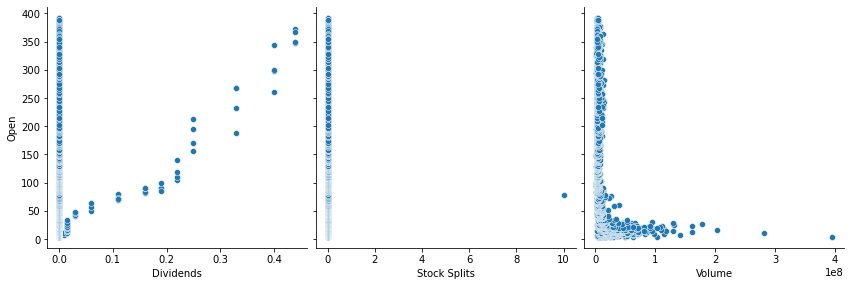

In [5]:
sns.pairplot(stocks_df, x_vars = ['Dividends', 'Stock Splits', 'Volume'],
            y_vars = 'Open', size=4, aspect=1, kind='scatter')
plt.show()

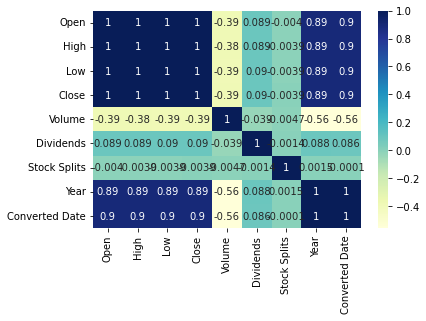

In [6]:
sns.heatmap(stocks_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Build Your Model

Now you are ready to build your model. First, assign your x- and y-variables.

In [7]:
x = stocks_df['Open']
y = stocks_df['Converted Date']

Use the code cells below to create your testing and training sets and output two of your sets to ensure that everything is working.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [10]:
X_train
y_train

2457    736024
1540    734690
384     733014
2560    736172
3320    737276
         ...  
1930    735260
79      732572
1859    735155
2840    736578
1544    734696
Name: Converted Date, Length: 2710, dtype: int64

In [11]:
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

With your training and testing sets ready to go, create your linear regression model. Use `summary()` to see how the model went.

In [15]:
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


const    733833.452784
Open         13.606355
dtype: float64

In [14]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Converted Date   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:44:48   Log-Likelihood:                -21665.
No. Observations:                2710   AIC:                         4.333e+04
Df Residuals:                    2708   BIC:                         4.335e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.338e+05     19.436   3.78e+04      0.000    7.34e+05    7.34e+05
Open          13.6064      0.128    106.299      0.000      13.355      13.857
==============================================================================
Omnibus:                      720.188   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.488
Skew:                          -0.296   Prob(JB):                     6.34e-35
Kurtosis:                       1.978   Cond. No.                         214.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a plot that shows your training sets and the linear regression line. Remember to use the values outputted above by `summary()` to make the line.

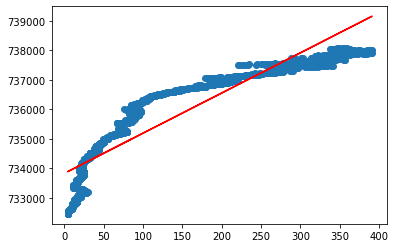

In [16]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 733833 + 13.6*X_train, 'r')
plt.show()

## Error Terms

With your model built, time to look at the error terms. Use the code cell below to create the residuals with the predicted y-variable and the y training set.

In [17]:
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

Now plot the residuals. Did you get a bell curve?

/Users/amandarichards25/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


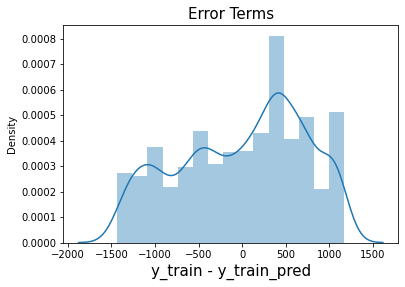

In [20]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Take some time to reflect on your linear regression model. Make note of your answers to the following questions.

1. When using a linear regression model to analyze financial data, getting an R-squared value above 0.7 is considered excellent. Was your R-squared value higher than this threshold?

The R-squared was .807, so it is above the threshold. 

2. Based on your analysis, would you recommend that linear regression be used to predict the price of Mastercard shares? 

Based on this analysis, the linear regression could be used to predict the price. 